
# **Vaex vs Pandas**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2020. All rights reserved

- Author: Antoine Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.7

In [1]:
import pandas as pd
import numpy as np
import vaex
import time
import os

*Big data is a field that treats ways to analyze, systematically extract information from, or otherwise, deal with data sets that are too large or complex to be dealt with by traditional data-processing application software.* (Wikipedia)

## Vaex

In [2]:
import vaex
n_rows, n_cols = 10000000, 20
### Note: this will create a csv file with size 0.5 GB.
df = pd.DataFrame(np.random.randint(0, 100, size=(n_rows, n_cols)), columns=['col%d' % i for i in range(n_cols)])
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
0,26,13,54,27,79,22,82,48,75,6,79,21,5,39,33,57,1,37,45,89
1,15,94,97,61,64,89,89,74,98,83,29,25,8,86,98,2,73,16,77,1
2,51,12,22,56,23,13,42,33,97,45,74,90,1,41,44,96,23,81,48,74
3,22,95,57,30,12,92,42,55,7,60,55,89,94,0,45,76,99,49,4,33
4,72,76,69,15,27,48,26,10,63,69,30,0,51,59,42,62,87,1,26,54


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 20 columns):
 #   Column  Dtype
---  ------  -----
 0   col0    int32
 1   col1    int32
 2   col2    int32
 3   col3    int32
 4   col4    int32
 5   col5    int32
 6   col6    int32
 7   col7    int32
 8   col8    int32
 9   col9    int32
 10  col10   int32
 11  col11   int32
 12  col12   int32
 13  col13   int32
 14  col14   int32
 15  col15   int32
 16  col16   int32
 17  col17   int32
 18  col18   int32
 19  col19   int32
dtypes: int32(20)
memory usage: 762.9 MB


In [7]:
df.info

<bound method DataFrame.info of          col0  col1  col2  col3  col4  col5  col6  col7  col8  col9  ...  \
0          26    13    54    27    79    22    82    48    75     6  ...   
1          15    94    97    61    64    89    89    74    98    83  ...   
2          51    12    22    56    23    13    42    33    97    45  ...   
3          22    95    57    30    12    92    42    55     7    60  ...   
4          72    76    69    15    27    48    26    10    63    69  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
9999995    55    97    46    14    96    46    83    55    34    56  ...   
9999996    57    42     2    19    54    94    41    87    49    33  ...   
9999997    76    33    27    96    32    26    32    54    57    75  ...   
9999998     0    12    93    27    67    94    50    49     8    13  ...   
9999999    57    72    11    53    30    77    85    63    64    17  ...   

         col11  col12  col13  col14  col15  col16  col1

In [4]:
file_name = "jackLargeFile"
file_name_csv = file_name + '.csv'
df.to_csv(file_name_csv, index=False)

In [8]:
dv = vaex.from_csv(file_name_csv, convert=True, chunk_size=5_000_000)
## This is the vaex conversion function. It works for very large files, by splitting the latter into small chunks.

In [9]:
print(type(dv))
print("Size of the csv file: ", os.stat(file_name_csv).st_size)
print("Size of the hdf5 file: ", os.stat(file_name_csv + '.hdf5').st_size)

<class 'vaex.hdf5.dataset.Hdf5MemoryMapped'>
Size of the csv file:  589994744
Size of the hdf5 file:  1600035456


In [10]:
dv = vaex.open(file_name_csv + '.hdf5')

In [25]:
## Compute the sum over the first column using vaex
t = time.time()
suma = dv.col1.sum()
t = time.time() - t
print("Sum: ", suma)
print("Computation time: ", np.round(t, 3), " seconds")

Sum:  494875833
Computation time:  0.022  seconds


In [19]:
## Compute the sum over the first column using pandas
t = time.time()
suma = df.col1.sum()
t = time.time() - t
print("Sum: ", suma)
print("Computation time: ", np.round(t, 3), " seconds")

Sum:  494875833
Computation time:  0.089  seconds


### Plotting with Vaex

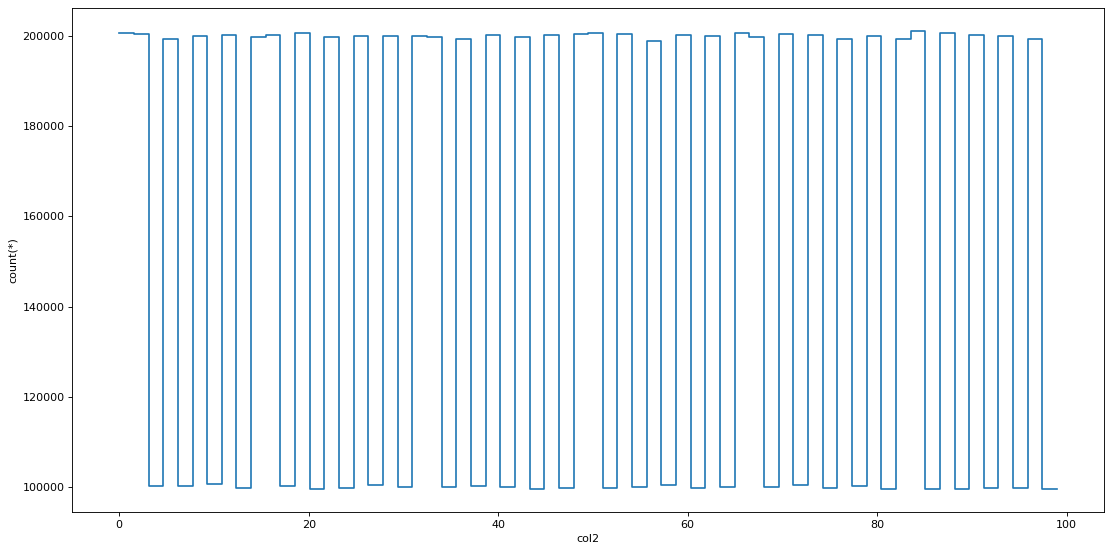

In [26]:
dv.plot1d(dv.col2, figsize=(14, 7));

Creating new columns

In [27]:
dv['col1_plus_col2'] = dv.col1 + dv.col2
dv['col1_plus_col2']

Expression = col1_plus_col2
Length: 10,000,000 dtype: int64 (column)
----------------------------------------
      0   67
      1  191
      2   34
      3  152
      4  145
    ...     
9999995  143
9999996   44
9999997   60
9999998  105
9999999   83

Filtering: Vaex does not create copy of the DataFrame when filtering the data

In [28]:
dvv = dv[dv.col1 > 90]
dvv.head()

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col1_plus_col2
0,15,94,97,61,64,89,89,74,98,83,29,25,8,86,98,2,73,16,77,1,191
1,22,95,57,30,12,92,42,55,7,60,55,89,94,0,45,76,99,49,4,33,152
2,8,91,25,0,8,52,60,28,45,74,54,91,61,24,86,62,94,59,29,53,116
3,42,98,86,17,29,83,3,9,81,41,66,67,28,79,61,69,52,86,33,89,184
4,61,94,78,96,76,17,13,38,55,7,16,85,71,14,36,75,41,86,28,4,172
5,73,93,32,60,35,49,97,70,85,66,3,20,91,15,4,48,78,85,53,57,125
6,88,95,73,23,74,29,62,34,39,53,92,39,43,11,64,19,37,68,70,89,168
7,80,91,70,25,3,40,86,71,73,59,62,4,71,62,13,50,37,58,44,45,161
8,59,99,24,75,4,62,17,37,14,16,86,73,14,81,69,38,55,58,28,78,123
9,21,99,27,94,98,79,72,92,83,8,69,37,43,44,61,91,2,38,33,71,126


### Aggregation

In [29]:
dv['col1_50'] = dv.col1 >= 50
## Binary columns

In [30]:
dv_group = dv.groupby(dv['col1_50'], agg=vaex.agg.sum(dv['col3']))
## groups data by col1_50 and calculates the sum of the col3 column.
dv_group

#,col1_50,col3_sum
0,False,2.47599e+08
1,True,2.47381e+08


### Joining data

In [31]:
dv_join = dv.join(dv_group, on='col1_50')

In [32]:
dv_join

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col1_plus_col2,col1_50,col3_sum
0,26,13,54,27,79,22,82,48,75,6,79,21,5,39,33,57,1,37,45,89,67,False,247598672
1,15,94,97,61,64,89,89,74,98,83,29,25,8,86,98,2,73,16,77,1,191,True,247380600
2,51,12,22,56,23,13,42,33,97,45,74,90,1,41,44,96,23,81,48,74,34,False,247598672
3,22,95,57,30,12,92,42,55,7,60,55,89,94,0,45,76,99,49,4,33,152,True,247380600
4,72,76,69,15,27,48,26,10,63,69,30,0,51,59,42,62,87,1,26,54,145,True,247380600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,999,995",55,97,46,14,96,46,83,55,34,56,74,13,45,16,63,59,86,17,40,20,143,True,247380600
"9,999,996",57,42,2,19,54,94,41,87,49,33,23,72,77,99,55,35,89,30,5,27,44,False,247598672
"9,999,997",76,33,27,96,32,26,32,54,57,75,90,5,13,36,54,52,53,83,16,68,60,False,247598672
"9,999,998",0,12,93,27,67,94,50,49,8,13,2,52,18,92,65,11,66,27,83,52,105,False,247598672


In [33]:
dv["Shift"] = dv.col1.shift(1)

AttributeError: 'Expression' object has no attribute 'shift'

## Beyond Pandas: Spark, Dask, Vaex and other big data technologies

https://towardsdatascience.com/beyond-pandas-spark-dask-vaex-and-other-big-data-technologies-battling-head-to-head-a453a1f8cc13

**Vaex uses LAZY EVALUATION**